<a href="https://colab.research.google.com/github/mariatomy9/WorldCup-Analysis/blob/main/EDA_on_FIFA_WorldCups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/udemy/DataVisualization/DataVisualization/EDA of FIFA World Cup Matches

/content/drive/MyDrive/udemy/DataVisualization/DataVisualization/EDA of FIFA World Cup Matches


# Importing dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
!pip install plotly==4.1.0

     |████████████████████████████████| 7.1MB 9.1MB/s 
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, but you'll have plotly 4.1.0 which is incompatible.
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [4]:
import plotly as py
import cufflinks as cf

In [5]:
py.io.renderers.default = 'colab'

In [6]:
from plotly.offline import iplot

In [7]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [8]:
world_cups=pd.read_csv('WorldCups.csv')
players=pd.read_csv('WorldCupPlayers.csv')
matches=pd.read_csv('WorldCupMatches.csv')

In [9]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [10]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [11]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


# Data Cleaning

In [12]:
matches.dropna(subset=['Year'],inplace=True)
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [13]:
matches['Home Team Name'].value_counts()

Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
                              ..
Serbia                         1
rn">Bosnia and Herzegovina     1
Ukraine                        1
rn">Trinidad and Tobago        1
rn">United Arab Emirates       1
Name: Home Team Name, Length: 78, dtype: int64

In [14]:
matches['Home Team Name'].str.contains('rn">')

0      False
1      False
2      False
3      False
4      False
       ...  
847    False
848    False
849    False
850    False
851    False
Name: Home Team Name, Length: 852, dtype: bool

In [15]:
names=matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

rn">Republic of Ireland       5
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
rn">United Arab Emirates      1
Name: Home Team Name, dtype: int64

In [16]:
names.index

Index(['rn">Republic of Ireland', 'rn">Trinidad and Tobago',
       'rn">Serbia and Montenegro', 'rn">Bosnia and Herzegovina',
       'rn">United Arab Emirates'],
      dtype='object')

In [17]:
wrong=list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina',
 'rn">United Arab Emirates']

In [18]:
correct=[name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina',
 'United Arab Emirates']

In [19]:
old = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new = ['Germany', 'Maracanã Stadium', 'Maracanã Stadium']

In [20]:
wrong=wrong+old
correct=correct+new

In [21]:
wrong,correct

(['rn">Republic of Ireland',
  'rn">Trinidad and Tobago',
  'rn">Serbia and Montenegro',
  'rn">Bosnia and Herzegovina',
  'rn">United Arab Emirates',
  'Germany FR',
  'Maracan� - Est�dio Jornalista M�rio Filho',
  'Estadio do Maracana'],
 ['Republic of Ireland',
  'Trinidad and Tobago',
  'Serbia and Montenegro',
  'Bosnia and Herzegovina',
  'United Arab Emirates',
  'Germany',
  'Maracanã Stadium',
  'Maracanã Stadium'])

In [22]:
for index,wr in enumerate(wrong):
  world_cups=world_cups.replace(wrong[index],correct[index])

for index,wr in enumerate(wrong):
  players=players.replace(wrong[index],correct[index])

for index,wr in enumerate(wrong):
  matches=matches.replace(wrong[index],correct[index])

In [23]:
names=matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Series([], Name: Home Team Name, dtype: int64)

# Country winning worldcup title most number of times

In [24]:
winner=world_cups['Winner'].value_counts()
winner

Brazil       5
Germany      4
Italy        4
Uruguay      2
Argentina    2
France       1
Spain        1
England      1
Name: Winner, dtype: int64

In [25]:
runnerup=world_cups['Runners-Up'].value_counts()
runnerup

Germany           4
Netherlands       3
Argentina         3
Brazil            2
Hungary           2
Czechoslovakia    2
Italy             2
Sweden            1
France            1
Name: Runners-Up, dtype: int64

In [26]:
third=world_cups['Third'].value_counts()
third

Germany        4
Brazil         2
Sweden         2
France         2
Poland         2
Chile          1
Netherlands    1
USA            1
Austria        1
Croatia        1
Portugal       1
Italy          1
Turkey         1
Name: Third, dtype: int64

In [27]:
teams=pd.concat([winner,runnerup,third],axis=1)
teams.fillna(0,inplace=True)
teams=teams.astype(int)
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Germany,4,4,4
Italy,4,2,1
Uruguay,2,0,0
Argentina,2,3,0
France,1,1,2
Spain,1,0,0
England,1,0,0
Netherlands,0,3,1
Hungary,0,2,0


In [28]:
teams.iplot(kind='bar',xTitle='Teams',yTitle='Count',title='FIFA WorldCup winning count')

## Number of Goals per country

In [60]:
matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,"13 Jul,1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930,"13 Jul,1930",Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [61]:
home=matches[['Home Team Name','Home Team Goals']].dropna()
away=matches[['Away Team Name','Away Team Goals']].dropna()

In [62]:
home.columns=['Countries','Goals']
away.columns=home.columns

In [63]:
home

,Countries,Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
847,Netherlands,0.0
848,Brazil,1.0
849,Netherlands,0.0
850,Brazil,0.0


In [64]:
away

,Countries,Goals
0,Mexico,1.0
1,Belgium,0.0
2,Brazil,1.0
3,Peru,1.0
4,France,0.0
...,...,...
847,Costa Rica,0.0
848,Germany,7.0
849,Argentina,0.0
850,Netherlands,3.0


In [65]:
goals=home.append(away,ignore_index=True)

In [66]:
goals

,Countries,Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
1699,Costa Rica,0.0
1700,Germany,7.0
1701,Argentina,0.0
1702,Netherlands,3.0


In [67]:
goals = goals.groupby('Countries').sum()

In [68]:
goals

,Goals
Countries,
Algeria,14.0
Angola,1.0
Argentina,133.0
Australia,11.0
Austria,43.0
...,...
United Arab Emirates,2.0
Uruguay,80.0
Wales,4.0


In [69]:
goals= goals.sort_values(by='Goals',ascending=False)
goals

,Goals
Countries,
Germany,235.0
Brazil,225.0
Argentina,133.0
Italy,128.0
France,108.0
...,...
Trinidad and Tobago,0.0
Canada,0.0
China PR,0.0


In [70]:
goals[:20].iplot(kind='bar', xTitle='Country Names', yTitle='Goals', title='Countries hit most number of goals')

## Attendence, Number of teams, Goals and Matches per Cup

In [71]:
world_cups['Attendance']=world_cups['Attendance'].str.replace(".","")

In [72]:
world_cups.head(1)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549


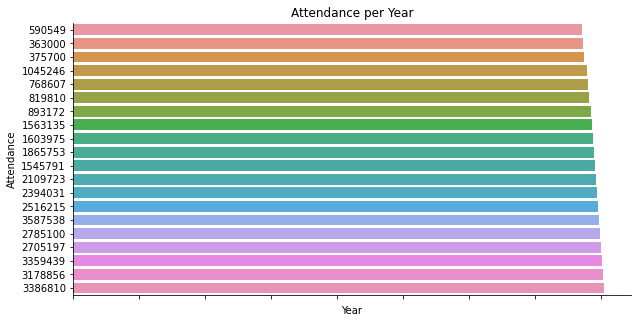

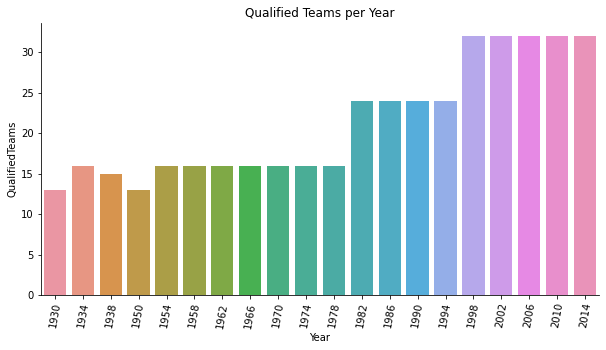

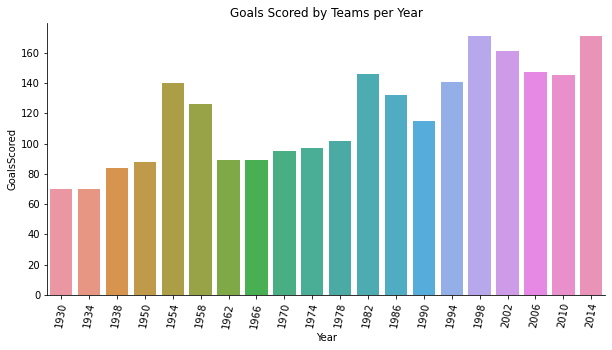

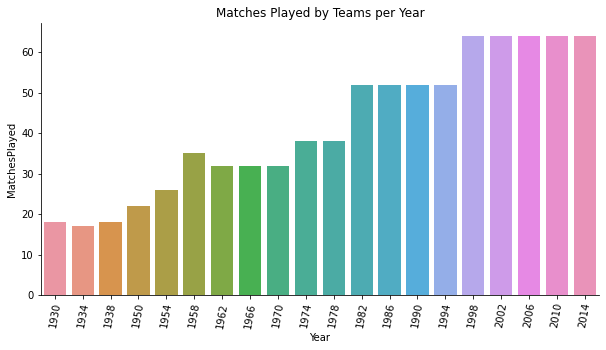

In [73]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'Attendance', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Attendance per Year')

#======================
fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Qualified Teams per Year')

#======================
fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Goals Scored by Teams per Year')

#======================
fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Matches Played by Teams per Year')



plt.show()

## Goals per team


In [74]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,"13 Jul,1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [75]:
home=matches.groupby(['Year','Home Team Name'])['Home Team Goals'].sum()
home

Year  Home Team Name
1930  Argentina         16.0
      Brazil             4.0
      Chile              4.0
      France             4.0
      Paraguay           1.0
                        ... 
2014  Russia             1.0
      Spain              1.0
      Switzerland        4.0
      USA                2.0
      Uruguay            3.0
Name: Home Team Goals, Length: 366, dtype: float64

In [76]:
away=matches.groupby(['Year','Away Team Name'])['Away Team Goals'].sum()
away

Year  Away Team Name
1930  Argentina         2.0
      Belgium           0.0
      Bolivia           0.0
      Brazil            1.0
      Chile             1.0
                       ... 
2014  Russia            1.0
      Spain             3.0
      Switzerland       3.0
      USA               4.0
      Uruguay           1.0
Name: Away Team Goals, Length: 411, dtype: float64

In [77]:
goals=pd.concat([home,away],axis=1)
goals.fillna(0,inplace=True)
goals['Goals']=goals['Home Team Goals'] + goals['Away Team Goals']
goals=goals.drop(labels=['Home Team Goals', 'Away Team Goals'],axis=1)
goals

Goals
1930 Argentina     18.0
     Belgium        0.0
     Bolivia        0.0
     Brazil         5.0
     Chile          5.0
...                 ...
2014 Russia         2.0
     Spain          4.0
     Switzerland    7.0
     USA            6.0
     Uruguay        4.0

[427 rows x 1 columns]

In [78]:
goals=goals.reset_index()

In [79]:
goals.columns=['Year','Country','Goals']
goals=goals.sort_values(by=['Year','Goals'],ascending=[True,False])
goals

,Year,Country,Goals
0,1930,Argentina,18.0
11,1930,Uruguay,15.0
10,1930,USA,7.0
12,1930,Yugoslavia,7.0
3,1930,Brazil,5.0
...,...,...,...
416,2014,Japan,2.0
422,2014,Russia,2.0
401,2014,Cameroon,1.0
413,2014,Honduras,1.0


In [80]:
top5=goals.groupby('Year').head(5)
top5.head(10)

,Year,Country,Goals
0,1930,Argentina,18.0
11,1930,Uruguay,15.0
10,1930,USA,7.0
12,1930,Yugoslavia,7.0
3,1930,Brazil,5.0
22,1934,Italy,12.0
20,1934,Germany,11.0
17,1934,Czechoslovakia,9.0
14,1934,Austria,7.0
21,1934,Hungary,5.0


In [81]:
import plotly.graph_objects as go

In [82]:
x,y=goals['Year'].values,goals['Goals'].values

In [83]:
data=[]
for team in top5['Country'].drop_duplicates().values:
  year=top5[top5['Country']==team]['Year']
  goal=top5[top5['Country']==team]['Goals']

  data.append(go.Bar(x=year,y=goal,name=team))

layout=go.Layout(barmode='stack',title='Top 5 teams with most number of goals',showlegend=False)
fig=go.Figure(data=data,layout=layout)
fig.show()

## Matches with highest number of attendence

In [84]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,"13 Jul,1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [85]:
matches['Datetime']=pd.to_datetime(matches['Datetime'])

In [86]:
matches['Datetime']=matches['Datetime'].apply(lambda x: x.strftime('%d %b,%Y'))

In [87]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,"13 Jul,1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


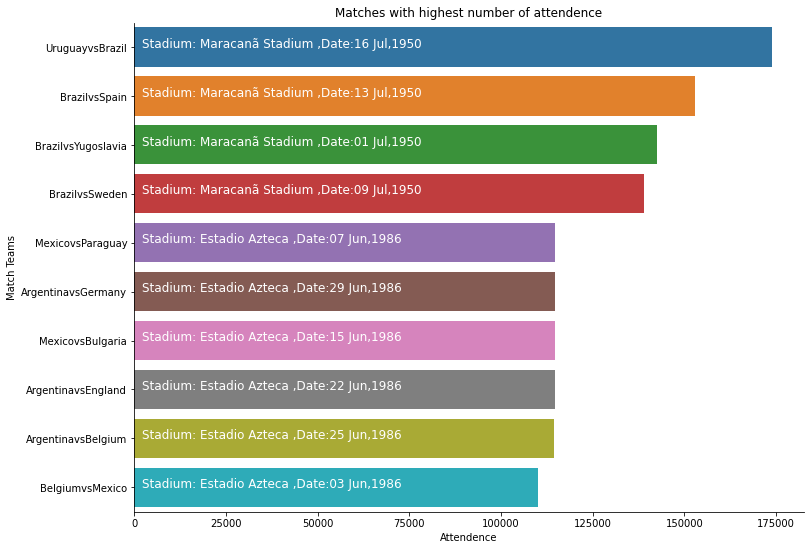

In [88]:
top10=matches.sort_values(by='Attendance',ascending=False)[:10]
top10['vs']=top10['Home Team Name']+"vs"+top10['Away Team Name']
plt.figure(figsize=(12,9))

ax=sns.barplot(y=top10['vs'], x=top10['Attendance'])
sns.despine(right=True)

plt.ylabel('Match Teams')
plt.xlabel('Attendence')
plt.title('Matches with highest number of attendence')

for i,s in enumerate("Stadium: " + top10['Stadium'] + " ,Date:" + top10['Datetime']):
  ax.text(2000,i,s,fontsize=12,color='white')


plt.show()


## Stadiums with highest average attendance

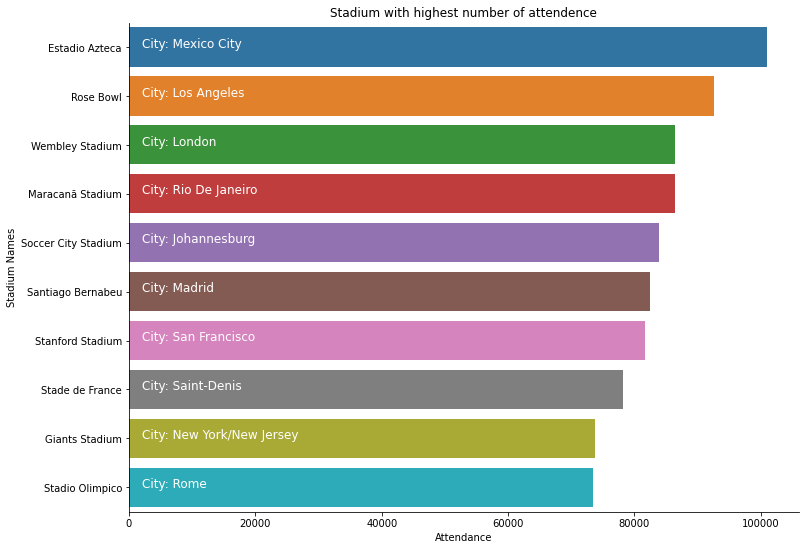

In [89]:
matches['Year']=matches['Year'].astype(int)
std=matches.groupby(['Stadium','City'])['Attendance'].mean().reset_index().sort_values(by='Attendance',ascending=False)
top10=std[:10]
plt.figure(figsize=(12,9))

ax=sns.barplot(y=top10['Stadium'], x=top10['Attendance'])
sns.despine(right=True)

plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title('Stadium with highest number of attendence')

for i,s in enumerate("City: " + top10['City']):
  ax.text(2000,i,s,fontsize=12,color='white')

plt.show()


In [90]:
matches['City'].value_counts()[:20].iplot(kind='bar')

## Match outcomes by home and away teams

In [94]:
def get_labels(matches):
  if matches['Home Team Goals']> matches['Away Team Goals']:
    return 'Home Team Win'
  if matches['Home Team Goals']< matches['Away Team Goals']:
    return 'Away Team Win'
  return 'DRAW'

In [95]:
matches['outcomes']=matches.apply(lambda x:get_labels(x),axis=1)

In [96]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,outcomes
0,1930,"13 Jul,1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Home Team Win
1,1930,"13 Jul,1930",Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Home Team Win
2,1930,"14 Jul,1930",Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Home Team Win
3,1930,"14 Jul,1930",Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Home Team Win
4,1930,"15 Jul,1930",Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Home Team Win


In [97]:
plt.figure(figsize=(6,6))
mt=matches['outcomes'].value_counts()
mt

Home Team Win    488
DRAW             190
Away Team Win    174
Name: outcomes, dtype: int64

<Figure size 432x432 with 0 Axes>

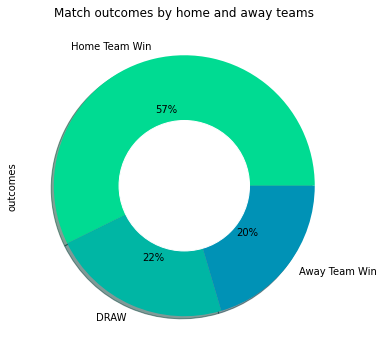

In [101]:
plt.figure(figsize=(6,6))
mt.plot.pie(autopct='%1.0f%%',colors=sns.color_palette('winter_r'),shadow=True)
c=plt.Circle((0,0),0.5,color='white')
plt.gca().add_artist(c)
plt.title('Match outcomes by home and away teams')
plt.show()
